#### Recognizing hand-written digits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Import the matplotlib to plot the images.
from sklearn.datasets import load_digits #Recognizing Handwriting. Import the module. load the digits from the datasets provided by sklearn module.

#### Read the dataset and store it in a variable.

In [2]:
digits_data = load_digits() #Reading the digits into the digits_data variable.
digits_data.data.shape #Check what is inside digits_data. 1797 image samples with 64 different features.
#1797 samples corresponds to 1797 target values but the target values have 10 unique values from 0 to 9. From this we can derive that all 1797 values are the different forms of range from 0 to 9 and we just have different samples of numbers from 0 to 9.

(1797, 64)

#### Display 1st image.

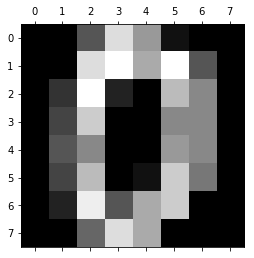

In [29]:
#Display the image array as a matrix.
#Selected the 1st image from our dataset whose index is 0.
plt.matshow(digits_data.images[0])
plt.show()

#### Image conversion.

<Figure size 432x288 with 0 Axes>

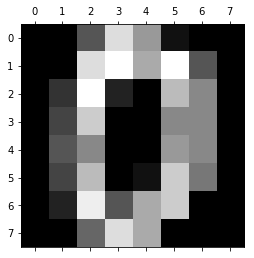

In [3]:
#Convert image into gray image use:
plt.gray()
plt.matshow(digits_data.images[0])
plt.show()
#For machine learning, all the images will be grayscale images represented as an array.

In [4]:
#Each element of the array represents a pixel of the array. The pixel values range from 0 to 255 where 0 stands for black and 255 represents a white pixel.
digits_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
#Next step, we will implement the machine learning algorithm on first 10 images of the dataset.
images = list(zip(digits_data.images, digits_data.target))
#The zip() function joins together the handwritten images and the target labels. The list() method creates a list of the concatenated images and labels. The result is stored in a variable.
plt.figure(figsize=(4,4)) #To plot the images, define the size of the plot screen.

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

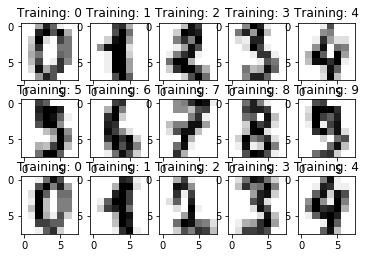

In [6]:
#Use the for loop to iterate through the first 10 images and plot them. As we have stored our images and target data into a list named images, we will use the enumerate method so that the handwritten images go into the image variable in for loop and the target labels go into the label variable in for loop. So for loop iterates through the handwritten images and through the target labels as well.
for i, (image, label) in enumerate(images[:15]):
#Initializing subplot of 3x5.
    plt.subplot(3,5, i+1)
#Display images in the subplots.
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#Set title for each subplot.
    plt.title("Training: %i" % label)
#Display the plot.
plt.show()

In [7]:
#Machine Learning.
#Get the total number of samples.
#Define and declare the variables for the handwritten images, the target labels and the total number of samples.
img_samples = len(digits_data.images) #This would define the number of images on which we have to perform our machine learning algorithm.

In [8]:
#Reshape method to reshape the images to flatten the images so that machine learning algorithm can be performed.
#Get the handwritten images.
img = digits_data.images.reshape(img_samples, -1)

In [9]:
#Get the target labels.
labels = digits_data.target

In [10]:
#Now we have to break our dataset into sample target. To achieve this, we will create a classifier by importing the svm as we imported datasets from sklearn:
from sklearn import svm
classify = svm.SVC(gamma=0.001)
#Main purpose of this is to slice or separate the images and labels.

In [11]:
#Get the first half of the images and target labels and store them in a variable.
#Flatten sample images are stored in img variable.
img_half = img[:img_samples // 2]
#Target labels are stored in labels variable.
labels_half = labels[:img_samples // 2]
#img_samples is the total number of image samples.

In [12]:
#Now that we have our images and target, we have to fit the model with the sample data as:
classify.fit(img_half, labels_half)
#Basically what we did is we have declared that the 50% of the data (1st half) as the training model. So 1st 50% of the images will predict the next 50% of the images.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#Now we will declare the remaining data as predict model or validation model.
labels_expected = digits_data.target[img_samples // 2:]
img_predicted = classify.predict(img[img_samples // 2:])

In [14]:
#Plot predicted images.
#Recall the first step where we zipped the handwritten images and the target labels into a list. In this step we will zip together the images that we predicted and the 2nd half of the images that we reserved for validation.
images_predictions = list(zip(digits_data.images[img_samples // 2:], img_predicted))
#Now simply use the for loop as in the first step to plot the images:


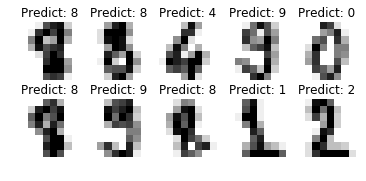

In [15]:
for i, (image, predict) in enumerate(images_predictions[:10]):
#Initialize the subplot of size 3x5
    plt.subplot(3,5, i+1)
#Turn of the axis values (the labels for each value in x and y axis)
    plt.axis('off')
#Display the predicted images in the subplot
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#Set the title for each subplot in the main plot
    plt.title("Predict: %i" % predict)
plt.show()

In [16]:
#To check the accuracy of the predicted images, you can use the metrics from sklearn module.
from sklearn import metrics

In [17]:
print("Classification Report %s:\n%s\n"
      % (classify, metrics.classification_report(labels_expected, img_predicted)))

Classification Report SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [18]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_expected, img_predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
